**ERA-5**

Tropical Cyclone Freddy (05.02-15.03) made landfall on February 24th for the second time in the Indian Ocean.

Target: 24.02 
lat: -10, -30
lon: 35, 120 

**Probleme:**
1. Wie greife ich auf die Levels zu?


0. libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from datetime import datetime
import sys
import warnings
from glob import glob
import pandas as pd
import netCDF4 as nc
import h5netcdf

1. lets load the data (which is already cut to lat lon time we need!)

In [2]:
era =  xr.open_dataset('../data/ERA_data_TC_Freddy.nc')
era

C:\Users\tinos\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:  (time: 156, lat: 81, lon: 341, level: 2)
Coordinates:
  * time     (time) datetime64[ns] 2023-02-05 ... 2023-03-15T18:00:00
  * lon      (lon) float32 35.0 35.25 35.5 35.75 ... 119.2 119.5 119.8 120.0
  * lat      (lat) float32 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * level    (level) int32 850 500
Data variables:
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    msl      (time, lat, lon) float32 ...
    t2m      (time, lat, lon) float32 ...
    d2m      (time, lat, lon) float32 ...
    sp       (time, lat, lon) float32 ...
    tp       (time, lat, lon) float32 ...
    u        (time, level, lat, lon) float32 ...
    v        (time, level, lat, lon) float32 ...
    z        (time, level, lat, lon) float32 ...
    q        (time, level, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Nov 16 10:53:03 2023: cdo -t ecmwf -chname,longitude,lo...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

Variables in ERA:


In [31]:
# era
# era.u10 # 10mwind in x direction
# era.v10
# era.msl # mean sea level pressure
# era.t2m # 2 meter temperature
# era.d2m # 2 meter dewpoint temperature
# era.u # u wind component ?at surface lvl?
# era.v
# era.z
# era.q #specific humidity

**2D plot of variable with fixed time**

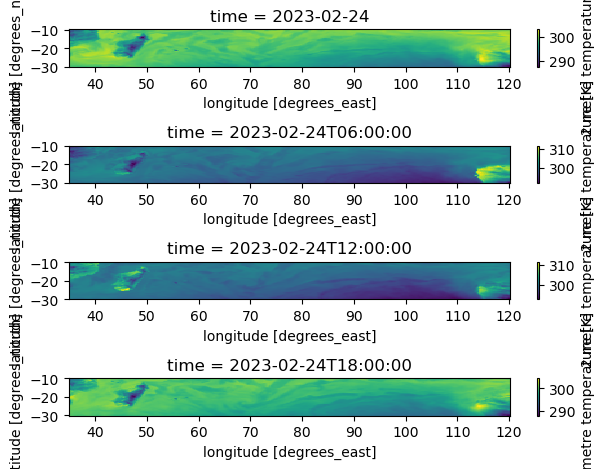

In [3]:
fig, axs = plt.subplots(nrows=4)

era.t2m.sel(time="2023-02-24T00:00:00.000000000").plot(ax=axs[0])
era.t2m.sel(time="2023-02-24T06:00:00.000000000").plot(ax=axs[1])
era.t2m.sel(time="2023-02-24T12:00:00.000000000").plot(ax=axs[2])
era.t2m.sel(time="2023-02-24T18:00:00.000000000").plot(ax=axs[3])

plt.tight_layout()
plt.draw()

**LVL PROBLEM TESTER**


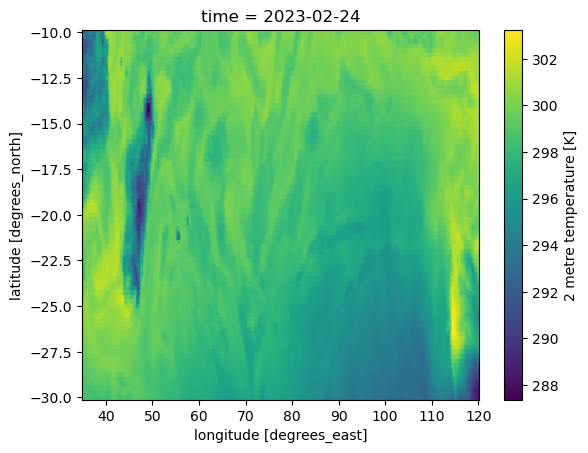

In [9]:
era.t2m.sel(time="2023-02-24T00:00:00.000000000").plot()


**1D plot of fixed point over time**

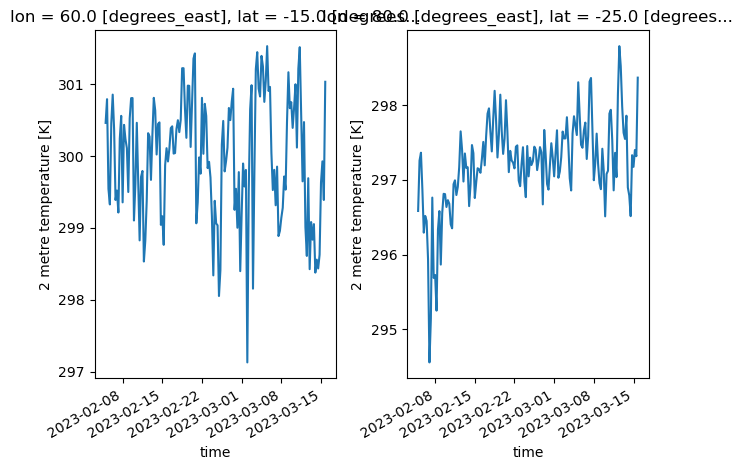

In [49]:
fig, axs = plt.subplots(ncols=2)

era.t2m.sel(lat=-15,lon=60).plot(ax=axs[0])
era.t2m.sel(lat=-25,lon=80).plot(ax=axs[1])

plt.tight_layout()
plt.draw()

**Global Plots**

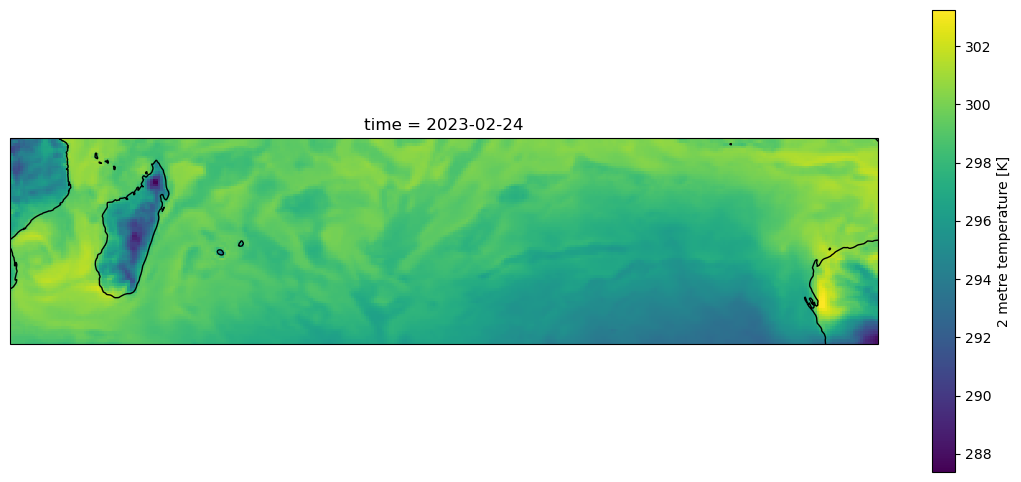

In [5]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

####--------------------------------------
# Create a figure instance
fig = plt.figure(figsize=(14,6))

# map and data projection are both in rectangular grid
map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)

p = era.t2m.sel(time="2023-02-24T00:00:00.000000000").plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # this is important!
    #cbar_kwargs={"orientation": "vertical", "shrink": 0.7, "label": "deg K"},
    #robust=True, # set colorbar limits to 2nd and 98th percentile of data
)

ax.add_feature(cfeature.COASTLINE, linestyle='-');

**2D Plot with layers** (not adjusted to this dataset yet)

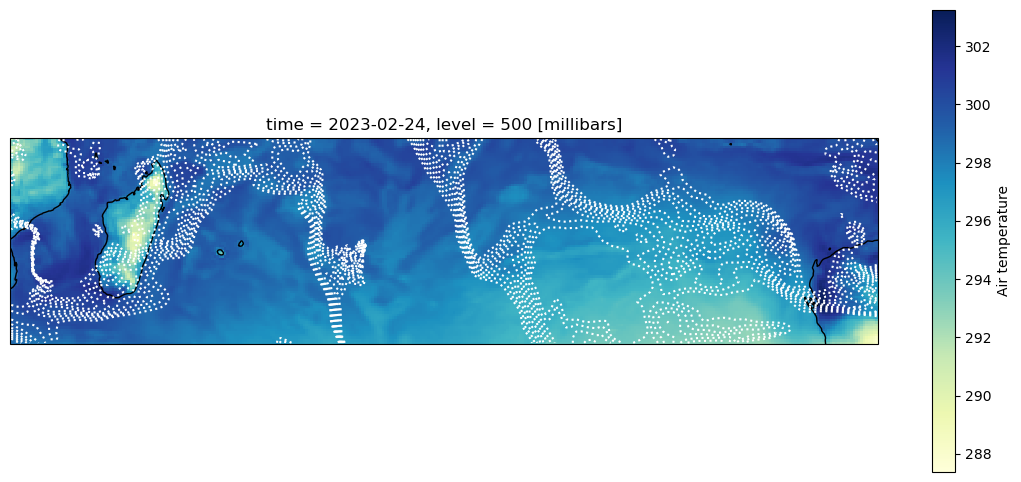

In [35]:

map_projection = ccrs.PlateCarree()

#data_projection = map_projection # map and data projection are both in rectangular grid

fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=map_projection)

# setting geographical boundaries to North Hemisphere
# Note: our data lons are in 0 to 360 but still cartopy can check it internally if we tell it in -180 to 180
# ax.set_extent([-10,-30,35,120]) 

T_levels=np.arange(280,310,2.5)

era.t2m.sel(time="2023-02-24T00:00:00.000000000").plot(ax=ax, transform=ccrs.PlateCarree(),
                                                       
                                                       
                                                       
                                                       #levels=T_levels, transform=map_projection, 
                                           #vmin=-120, vmax=-30, # sets bounds of the colour bar, 
                                                            # specially important for multiple plots 
                                           cmap='YlGnBu', 
                                           cbar_kwargs=dict( # controlling colour bar params
                                               label='Air temperature',
                                               # ticks= np.arange(0,112,10) # uncomment to set custom ticks
                                               # shrink=0.8 # to control size
                                                          )
                                          )

era.v.sel(time="2023-02-24T00:00:00.000000000", level=500).squeeze().plot.contour(levels=np.arange(0,5,0.5),
                                                                       colors='w', linestyles='dotted')




ax.add_feature(cfeature.COASTLINE, linestyle='-');